#### **Importing Libraries & reading data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### **EDA**

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.drop(columns='Outcome').describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'DiabetesPedigreeFunction'),
  Text(7.5, 0, 'Age'),
  Text(8.5, 0, 'Outcome')])

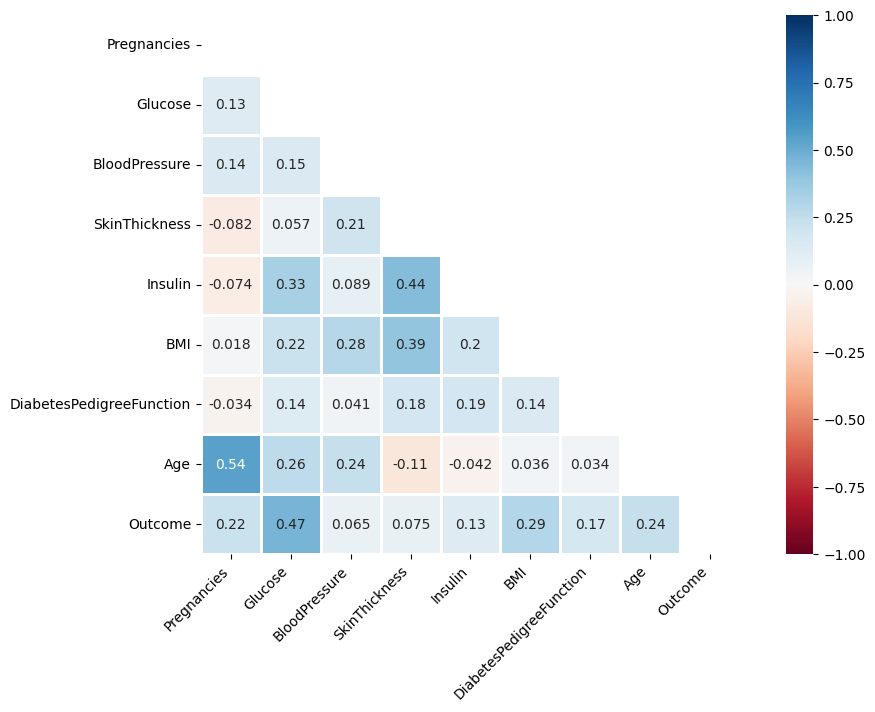

In [7]:
cm = df.corr()
plt.figure(figsize=(12,7))
mask = np.triu(np.ones_like(cm, dtype=bool))
sns.heatmap(cm, vmin=-1,vmax=1, annot=True, cmap='RdBu', mask = mask ,linewidths=1, square=True)
plt.xticks(rotation=45, ha='right')

In [8]:
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

- 0--> non diabetic   
- 1--> diabetic

In [9]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [10]:
X = df.drop(columns='Outcome')
y = df.Outcome.copy()

#### **Splitting data**

In [11]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X.shape, X_tr.shape, X_te.shape)
print(y.shape, y_tr.shape, y_te.shape)

(768, 8) (614, 8) (154, 8)
(768,) (614,) (154,)


#### **Standardization**

In [14]:
sc = StandardScaler()
X_tr_sc = sc.fit_transform(X_tr)
X_te_sc = sc.transform(X_te)

#### **Model creation and training**

In [38]:
#helper function to train the model and evaluate accuracy score
def model_tr_eval(clf):
    model = clf
    model.fit(X_tr_sc, y_tr)
    #training
    X_pred_tr = model.predict(X_tr)
    print(f'Model training accuarcy : {accuracy_score(X_pred_tr,y_tr):.3f}')
    #testing
    X_pred = model.predict(X_te)
    print(f'Model testing accuarcy : {accuracy_score(X_pred,y_te):.3f}')
    print(classification_report(X_pred, y_te))
    print('Confusion Matrix:')
    cm = confusion_matrix(X_pred,y_te)
    lbl = ['non_diabetic','diabetic']
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, cmap='RdBu', linewidths=1, xticklabels=lbl, yticklabels=lbl, square=True)

#### **trying different models to get best score**

Model training accuarcy : 0.347
Model testing accuarcy : 0.357
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.36      0.53       154

    accuracy                           0.36       154
   macro avg       0.50      0.18      0.26       154
weighted avg       1.00      0.36      0.53       154

Confusion Matrix:


c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samp

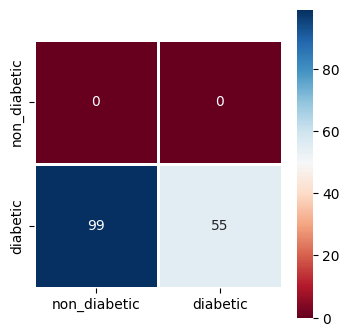

In [44]:
model_tr_eval(LogisticRegression())

c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

Model training accuarcy : 0.347
Model testing accuarcy : 0.357
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.36      0.53       154

    accuracy                           0.36       154
   macro avg       0.50      0.18      0.26       154
weighted avg       1.00      0.36      0.53       154

Confusion Matrix:


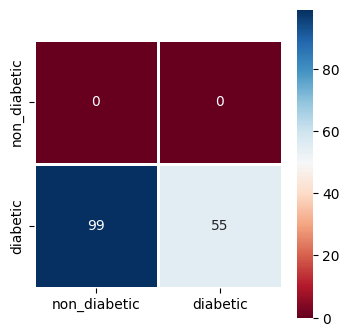

In [40]:
model_tr_eval(svm.SVC(kernel='linear'))

c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no t

Model training accuarcy : 0.349
Model testing accuarcy : 0.357
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.36      0.53       154

    accuracy                           0.36       154
   macro avg       0.50      0.18      0.26       154
weighted avg       1.00      0.36      0.53       154

Confusion Matrix:


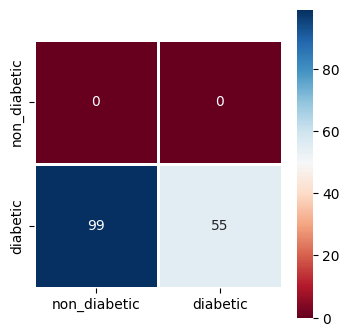

In [41]:
model_tr_eval(DecisionTreeClassifier(criterion='gini',max_depth=3,splitter='best',min_samples_split=3))

Model training accuarcy : 0.454
Model testing accuarcy : 0.545
              precision    recall  f1-score   support

           0       0.52      0.70      0.59        73
           1       0.60      0.41      0.49        81

    accuracy                           0.55       154
   macro avg       0.56      0.55      0.54       154
weighted avg       0.56      0.55      0.54       154

Confusion Matrix:


c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


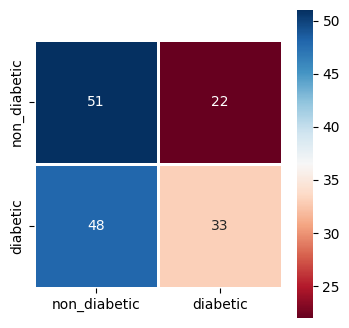

In [42]:
model_tr_eval(RandomForestClassifier(n_estimators=12, criterion='gini',max_depth=3))

c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Model training accuarcy : 0.430
Model testing accuarcy : 0.357
              precision    recall  f1-score   support

           0       0.17      0.50      0.26        34
           1       0.69      0.32      0.43       120

    accuracy                           0.36       154
   macro avg       0.43      0.41      0.34       154
weighted avg       0.58      0.36      0.39       154

Confusion Matrix:


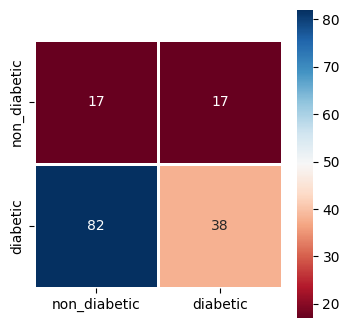

In [43]:
model_tr_eval(KNeighborsClassifier(n_neighbors=6,weights='uniform',))

Model training accuarcy : 0.752
Model testing accuarcy : 0.766
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        95
           1       0.71      0.66      0.68        59

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:


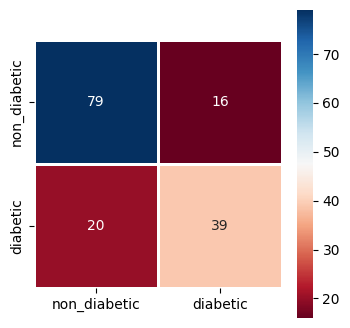

In [30]:
model_tr_eval(GaussianNB())

- So according to the result, Gaussian has performed the best. So we will use it and save that model

#### **Prediction system**

In [45]:
clf = RandomForestClassifier(n_estimators=12, criterion='gini',max_depth=3)
clf.fit(X_tr_sc,y_tr)

RandomForestClassifier(max_depth=3, n_estimators=12)

In [46]:
# 1,147,94,41,0,49.3,0.358,27,1
# 1,81,74,41,57,46.3,1.096,32,0
# 3,187,70,22,200,36.4,0.408,36,1
# 6,162,62,0,0,24.3,0.178,50,1
# 4,136,70,0,0,31.2,1.182,22,1
# 1,121,78,39,74,39,0.261,28,0

input = (1,85,66,29,0,26.6,0.351,31)
# input = (3,187,70,22,200,36.4,0.408,36)
#converting to array
input_arr = np.asarray(input)
#reshape
input_resh = input_arr.reshape(1,-1)
#standardize
std_inp = sc.transform(input_resh)

c:\Users\PRATIK PAL\Desktop\Self Study\APPS\flower_classify\.conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
pred = clf.predict(std_inp)[0]
if pred == 0:
    print('Non Diabetic')
else:
    print('Diabetic')


Non Diabetic


#### **saving the model**

In [48]:
import joblib
joblib.dump(clf,'model.joblib')

['model.joblib']